In [83]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [88]:
df=pd.read_csv("Ratings Scraped.csv")

In [89]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Benefits and perks,Job Type,monthly,hourly,daily,min_salary,max_salary,avg_salary,job_state,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,"₹5,00,000 - ₹10,00,000 a year","\nData Scientist - Machine Learning, Image Pro...",4.5,Aventior,"Pune, Maharashtra",Health insurance,Full-time,0,0,0,500000,1000000,750000.0,Maharashtra,1,0,0,0,0
1,Data Scientist,"₹11,00,000 - ₹12,00,000 a year","\nExperience using python, deep learning, LSTM...",3.6,Serendipity Corporate Services,"Pune, Maharashtra",NaN,Full-time,0,0,0,1100000,1200000,1150000.0,Maharashtra,1,0,0,0,1
2,Assistant Data Science Engineer,"Up to ₹9,60,000 a year",\nchanging operational and environmental requi...,NaN,Educate Girls,"Mumbai, Maharashtra",NaN,Full-time,0,0,0,0,960000,480000.0,Maharashtra,1,0,0,1,1
3,Data Scientist,"₹20,00,000 - ₹30,00,000 a year",\nRole: Data Scientist (Structured Data)\nLoca...,-1.0,Flipped.ai,"Remote in Bengaluru, Karnataka\n+1 location","Work from home , Provident Fund , Health insur...",Full-time,0,0,0,2000000,3000000,2500000.0,Karnataka\n+1location,1,0,1,1,0
4,Assistant Data Scientist,"Up to ₹10,00,000 a year",\nJob Responsibilities:\nIdentify valuable dat...,-1.0,Ascendeum,"Remote in Bengaluru, Karnataka","Work from home , Internet reimbursement",Full-time,0,0,0,0,1000000,500000.0,Karnataka,1,0,0,0,1


In [60]:
def title_simplifier(title):
    if "data scientist" in title.lower() or "data science" in title.lower() or "artificial inteligence"in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"  

def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower() or "sr." in title.lower() :
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"

In [61]:
# simplify the title
df["job_simp"]=df["Job Title"].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    126
na                 32
mle                21
analyst             4
manager             4
data engineer       2
Name: job_simp, dtype: int64

In [62]:
df["seniority"]=df["Job Title"].apply(seniority)
df.seniority.value_counts()

na        166
senior     22
jr          1
Name: seniority, dtype: int64

In [63]:
#remove non states
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="bengaluru" else "Karnataka")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="pune" else "Maharashtra")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="chennai" else "Tamil Nadu")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="indore" else "MadhyaPradesh")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="ludhiana" else "Punjab")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="india" else "na")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="remote" else "na")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="Telangana\n+2locations" else "Telangana")
df["job_state"]=df["job_state"].apply(lambda x: x.strip() if x.strip().lower()!="Karnataka\n+2locations" else "Karnataka")
df["job_state"]=df["job_state"].apply(lambda x: x.split("\n")[0] if ("\n")in x else x)
df.job_state.value_counts()


Maharashtra      39
Karnataka        35
TamilNadu        23
Kerala           17
Telangana        13
UttarPradesh     11
Delhi             9
na                9
Gujarat           9
Haryana           6
MadhyaPradesh     5
WestBengal        5
Rajasthan         3
Chandigarh        2
Punjab            1
Tamil Nadu        1
AndhraPradesh     1
Name: job_state, dtype: int64

In [64]:
#find the total length of the description
df["dec_len"]=df["Job Description"].apply(lambda x:len(x))
df["dec_len"]

0      1462
1       606
2      5373
3      4196
4      1696
       ... 
184    3090
185    1376
186    2357
187    2048
188     606
Name: dec_len, Length: 189, dtype: int64

In [65]:
#monthly wage to anual
df["min_salary"]=df.apply(lambda x: x.min_salary*12 if x.monthly==1 else x.min_salary, axis=1)
df["max_salary"]=df.apply(lambda x: x.max_salary*12 if x.monthly==1 else x.max_salary, axis=1)

In [66]:
df[df.monthly==1][["Salary Estimate","monthly","min_salary","max_salary"]]

,Salary Estimate,monthly,min_salary,max_salary
7,"From ₹15,000 a month",1,180000,0
9,"₹25,000 a month",1,300000,0
13,"₹40,000 - ₹80,000 a month",1,480000,960000
17,"₹10,000 - ₹40,000 a month",1,120000,480000
18,"₹20,000 - ₹40,000 a month",1,240000,480000
19,"₹25,000 a month",1,300000,0
25,"₹20,000 a month",1,240000,0
31,"₹40,000 - ₹65,000 a month",1,480000,780000
34,"₹5,000 - ₹15,000 a month",1,60000,180000
38,"₹90,000 - ₹1,50,000 a month",1,1080000,1800000


In [67]:
df["min_salary"]=df.apply(lambda x: x.min_salary*2815 if x.hourly==1 else x.min_salary, axis=1)
df["max_salary"]=df.apply(lambda x: x.max_salary*2815 if x.hourly==1 else x.max_salary, axis=1)

In [68]:
df[df.hourly==1][["Salary Estimate","hourly","min_salary","max_salary"]]

,Salary Estimate,hourly,min_salary,max_salary
71,"From ₹2,000 an hour",1,5630000,0
144,"₹1,500 - ₹2,000 an hour",1,4222500,5630000


In [69]:
df["min_salary"]=df.apply(lambda x: x.min_salary*312 if x.daily==1 else x.min_salary, axis=1)
df["max_salary"]=df.apply(lambda x: x.max_salary*312 if x.daily==1 else x.max_salary, axis=1)

In [70]:
df[df.daily==1][["Salary Estimate","daily","min_salary","max_salary"]]


,Salary Estimate,daily,min_salary,max_salary
159,"₹7,500 a day",1,2340000,0


In [71]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Benefits and perks,Job Type,monthly,hourly,...,avg_salary,job_state,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,dec_len
0,Data Scientist,"₹5,00,000 - ₹10,00,000 a year","\nData Scientist - Machine Learning, Image Pro...",4.5,Aventior,"Pune, Maharashtra",Health insurance,Full-time,0,0,...,750000.0,Maharashtra,1,0,0,0,0,data scientist,na,1462
1,Data Scientist,"₹11,00,000 - ₹12,00,000 a year","\nExperience using python, deep learning, LSTM...",3.6,Serendipity Corporate Services,"Pune, Maharashtra",NaN,Full-time,0,0,...,1150000.0,Maharashtra,1,0,0,0,1,data scientist,na,606
2,Assistant Data Science Engineer,"Up to ₹9,60,000 a year",\nchanging operational and environmental requi...,NaN,Educate Girls,"Mumbai, Maharashtra",NaN,Full-time,0,0,...,480000.0,Maharashtra,1,0,0,1,1,data scientist,na,5373
3,Data Scientist,"₹20,00,000 - ₹30,00,000 a year",\nRole: Data Scientist (Structured Data)\nLoca...,-1.0,Flipped.ai,"Remote in Bengaluru, Karnataka\n+1 location","Work from home , Provident Fund , Health insur...",Full-time,0,0,...,2500000.0,Karnataka,1,0,1,1,0,data scientist,na,4196
4,Assistant Data Scientist,"Up to ₹10,00,000 a year",\nJob Responsibilities:\nIdentify valuable dat...,-1.0,Ascendeum,"Remote in Bengaluru, Karnataka","Work from home , Internet reimbursement",Full-time,0,0,...,500000.0,Karnataka,1,0,0,0,1,data scientist,na,1696


In [72]:
df.describe()

,Rating,monthly,hourly,daily,min_salary,max_salary,avg_salary,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,dec_len
count,153.000000,189.000000,189.000000,189.000000,1.890000e+02,1.890000e+02,1.890000e+02,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,1.536601,0.312169,0.010582,0.005291,8.596816e+05,1.179015e+06,8.809042e+05,0.756614,0.005291,0.116402,0.174603,0.306878,1933.582011
std,2.733798,0.464609,0.102595,0.072739,1.274109e+06,1.266597e+06,1.009319e+06,0.430266,0.072739,0.321558,0.380636,0.462423,1159.074943
min,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-1.000000,0.000000,0.000000,0.000000,1.800000e+05,1.800000e+05,3.250000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,1192.000000
50%,-1.000000,0.000000,0.000000,0.000000,4.478710e+05,7.200000e+05,5.250000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,1689.000000
75%,4.500000,1.000000,0.000000,0.000000,1.000000e+06,1.800000e+06,1.300000e+06,1.000000,0.000000,0.000000,0.000000,1.000000,2499.000000
max,5.000000,1.000000,1.000000,1.000000,7.500000e+06,6.000000e+06,5.500000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,6916.000000


In [73]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Benefits and perks', 'Job Type', 'monthly',
       'hourly', 'daily', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'dec_len'],
      dtype='object')

<AxesSubplot:>

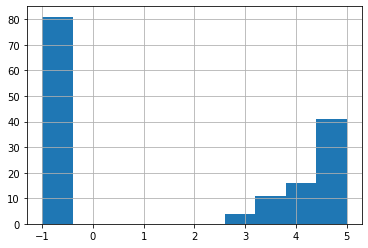

In [74]:
df.Rating.hist()

<AxesSubplot:>

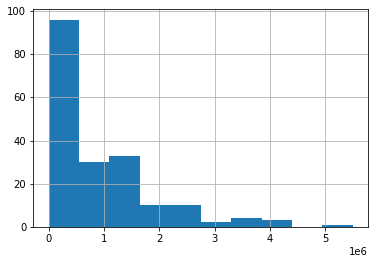

In [75]:
df.avg_salary.hist()

<AxesSubplot:>

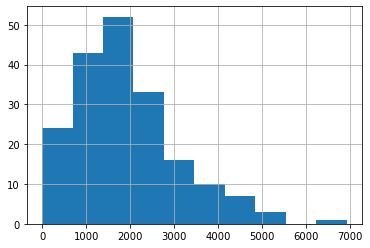

In [76]:
df.dec_len.hist()

<AxesSubplot:>

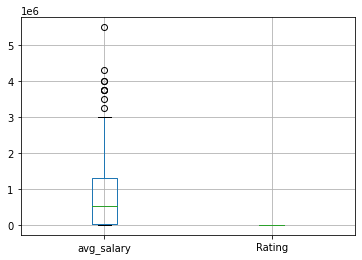

In [77]:
df.boxplot(column=["avg_salary","Rating"])

<AxesSubplot:>

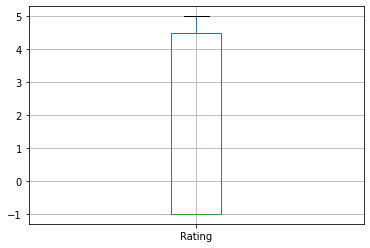

In [78]:
df.boxplot(column=["Rating"])


In [79]:
df[["avg_salary","Rating","dec_len"]].corr()

,avg_salary,Rating,dec_len
avg_salary,1.000000,0.103598,0.101076
Rating,0.103598,1.000000,-0.001270
dec_len,0.101076,-0.001270,1.000000


<AxesSubplot:>

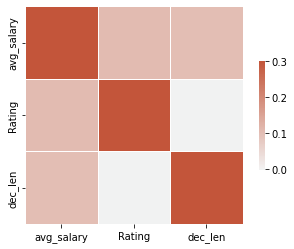

In [80]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df[["avg_salary","Rating","dec_len"]].corr(),vmax=.3, center=0,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Benefits and perks', 'Job Type', 'monthly',
       'hourly', 'daily', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'dec_len'],
      dtype='object')

In [82]:
df["Location",""

SyntaxError: unexpected EOF while parsing (3643145318.py, line 1)